In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
airline_df = pd.read_csv('international-airline-passengers.csv',delimiter = ';')

In [6]:
airline_df['Month'] = pd.to_datetime(airline_df['Month'])
airline_df.set_index('Month', inplace=True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
airline_df['Passengers_normalized'] = scaler.fit_transform(airline_df[['Passengers']])
print(airline_df.head())

            Passengers  Passengers_normalized
Month                                        
1949-01-01         112               0.015444
1949-02-01         118               0.027027
1949-03-01         132               0.054054
1949-04-01         129               0.048263
1949-05-01         121               0.032819


In [8]:
values = airline_df['Passengers_normalized'].values

# Prepare input-output pairs
X, y = [], []
window_size = 5

for i in range(len(values) - window_size):
    X.append(values[i:i+window_size])
    y.append(values[i+window_size])

X = np.array(X)
y = np.array(y)

In [9]:
# Split index
split_index = int(len(X) * 0.8)

# Training set
X_train, y_train = X[:split_index], y[:split_index]

# Testing set
X_test, y_test = X[split_index:], y[split_index:]

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [12]:
# Reshape input data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [13]:
model = Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(5, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train_rnn, y_train,
    validation_data=(X_test_rnn, y_test),
    epochs=30,
    verbose=1
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.2233 - val_loss: 0.1635
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0229 - val_loss: 0.0529
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0403 - val_loss: 0.0656
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0346 - val_loss: 0.0356
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0146 - val_loss: 0.0635
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159 - val_loss: 0.0796
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0160 - val_loss: 0.0626
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125 - val_loss: 0.0405
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0103 - val_loss: 0.0319
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - val_loss: 0.0311
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0090 - val_loss: 0.0309
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - val_loss: 0.0320


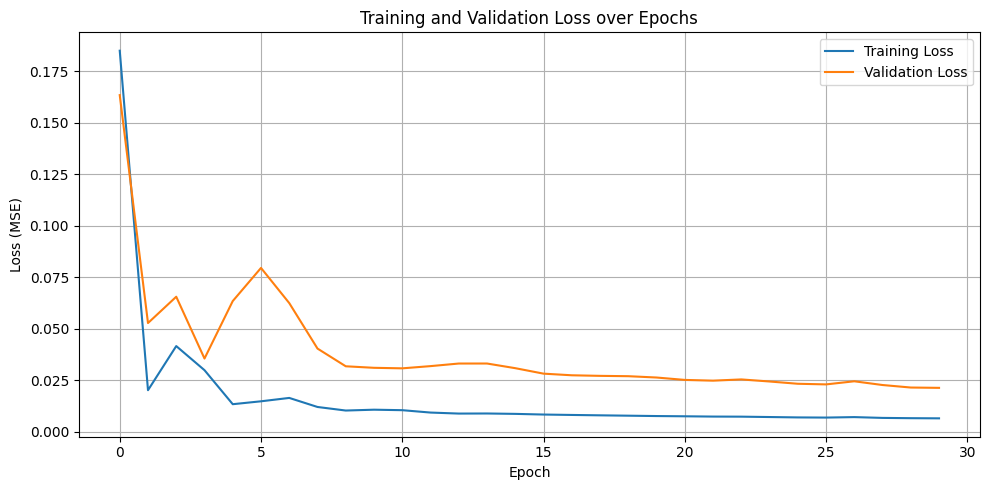

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Predict on test set
y_pred = model.predict(X_test_rnn)
# Reshape for inverse_transform
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Inverse transform
y_test_actual = scaler.inverse_transform(y_test_reshaped)
y_pred_actual = scaler.inverse_transform(y_pred_reshaped)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

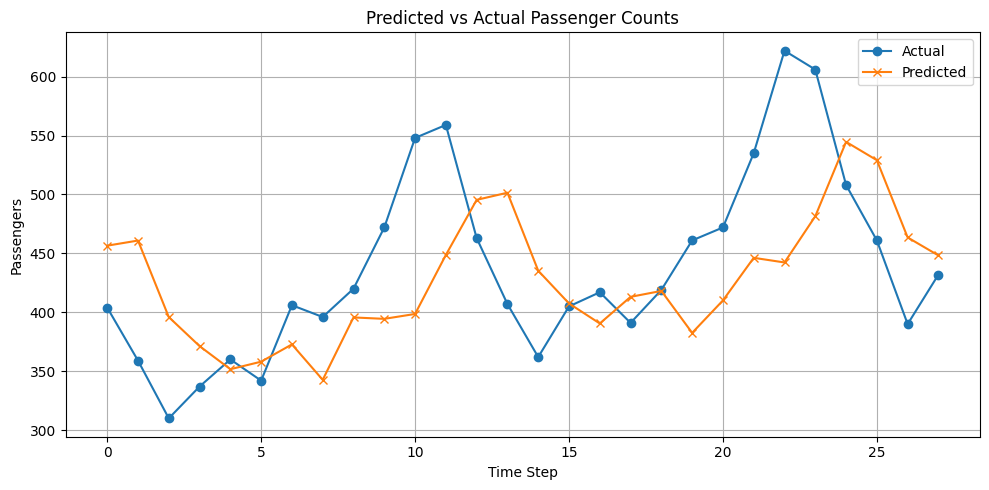

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual', marker='o')
plt.plot(y_pred_actual, label='Predicted', marker='x')
plt.title('Predicted vs Actual Passenger Counts')
plt.xlabel('Time Step')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show

This project uses a Recurrent Neural Network (RNN) to predict monthly airline passenger counts based on the past five months of data. The data is normalized, converted into sequential input-output pairs, and split into training and testing sets. A simple RNN model with one hidden layer is trained for 30 epochs, and its performance is evaluated by comparing predicted and actual values. The model captures general trends, but improvements like using LSTM layers or more data could enhance accuracy.